In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
data = pd.read_csv('german_credit_data.csv')

In [3]:
data.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,0,67,male,2,own,NaN,little,1169,6,radio/TV
1,1,22,female,2,own,little,moderate,5951,48,radio/TV
2,2,49,male,1,own,little,NaN,2096,12,education
3,3,45,male,2,free,little,little,7882,42,furniture/equipment
4,4,53,male,2,free,little,little,4870,24,car


In [5]:
#Removing 'unamed:0' variable. there is no difference between this variable and index variable
data.drop('Unnamed: 0', axis=1, inplace=True)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   int64 
 3   Housing           1000 non-null   object
 4   Saving accounts   817 non-null    object
 5   Checking account  606 non-null    object
 6   Credit amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
dtypes: int64(4), object(5)
memory usage: 70.4+ KB


In [9]:
data.isnull().sum()

Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
dtype: int64

In [12]:
data['Checking account'].value_counts()

little      274
moderate    269
rich         63
Name: Checking account, dtype: int64

In [15]:
data['Saving accounts'].isnull().sum()

183

In [17]:
# Remving checking account and saving account variable
data.drop(['Checking account', 'Saving accounts'], axis=1, inplace=True)

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Age            1000 non-null   int64 
 1   Sex            1000 non-null   object
 2   Job            1000 non-null   int64 
 3   Housing        1000 non-null   object
 4   Credit amount  1000 non-null   int64 
 5   Duration       1000 non-null   int64 
 6   Purpose        1000 non-null   object
dtypes: int64(4), object(3)
memory usage: 54.8+ KB


In [32]:
# Hotencoding categorical variables
# Job variable dtype is categorical and not continuous. therefore it will be hotencoded
data_copy = pd.get_dummies(data, columns=['Sex', 'Housing','Purpose', 'Job'])

In [33]:
data_copy

,Age,Credit amount,Duration,Sex_female,Sex_male,Housing_free,Housing_own,Housing_rent,Purpose_business,Purpose_car,Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_radio/TV,Purpose_repairs,Purpose_vacation/others,Job_0,Job_1,Job_2,Job_3
0,67,1169,6,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0
1,22,5951,48,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0
2,49,2096,12,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0
3,45,7882,42,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0
4,53,4870,24,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,31,1736,12,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0
996,40,3857,30,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1
997,38,804,12,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0
998,23,1845,45,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0


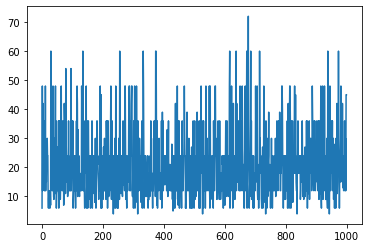

In [26]:
data_copy['Duration'].plot()

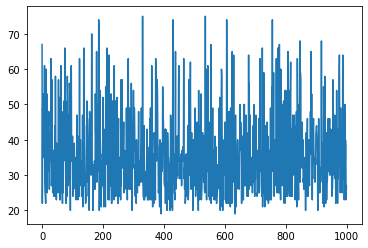

In [31]:
plt.plot(data_copy['Age'])

In [34]:
# In order to avoid overfitting i remove one varibale in Gender
data_copy.drop('Sex_female', axis=1, inplace=True)

In [35]:
data_copy.corr()

,Age,Credit amount,Duration,Sex_male,Housing_free,Housing_own,Housing_rent,Purpose_business,Purpose_car,Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_radio/TV,Purpose_repairs,Purpose_vacation/others,Job_0,Job_1,Job_2,Job_3
Age,1.000000,0.032716,-0.036136,0.161694,0.253058,0.006553,-0.212620,-0.001772,0.099919,-0.012562,0.060390,-0.127657,-0.046401,0.039567,0.042365,0.059954,0.043712,-0.148283,0.127605
Credit amount,0.032716,1.000000,0.624984,0.093482,0.201643,-0.117497,-0.024611,0.103016,0.125575,-0.069268,-0.034796,-0.034037,-0.173203,-0.028875,0.192893,-0.027969,-0.161757,-0.092636,0.319715
Duration,-0.036136,0.624984,1.000000,0.081432,0.189117,-0.075169,-0.064417,0.164113,-0.005320,-0.037212,-0.025450,-0.062804,-0.044319,-0.022549,0.104516,-0.044043,-0.181203,0.055010,0.147515
Sex_male,0.161694,0.093482,0.081432,1.000000,0.100872,0.119638,-0.222845,0.080875,0.047893,-0.045275,-0.052397,-0.100467,0.008668,0.026828,0.014297,-0.076356,-0.010811,-0.007613,0.054070
Housing_free,0.253058,0.201643,0.189117,0.100872,1.000000,-0.548445,-0.162474,-0.059613,0.126806,-0.038348,0.117976,-0.071530,-0.109357,0.013706,0.080010,0.035671,-0.109543,-0.033633,0.154388
Housing_own,0.006553,-0.117497,-0.075169,0.119638,-0.548445,1.000000,-0.735968,0.051083,-0.099526,0.029317,-0.075684,-0.040496,0.134705,0.019803,-0.011288,-0.040480,0.063003,0.012866,-0.071741
Housing_rent,-0.212620,-0.024611,-0.064417,-0.222845,-0.162474,-0.735968,1.000000,-0.012013,0.014773,-0.003546,-0.006211,0.105700,-0.070414,-0.034465,-0.051460,0.018886,0.014347,0.012049,-0.040344
Purpose_business,-0.001772,0.103016,0.164113,0.080875,-0.059613,0.051083,-0.012013,1.000000,-0.233669,-0.036121,-0.082068,-0.154078,-0.204388,-0.049157,-0.036121,-0.003087,0.005068,-0.007768,0.006128
Purpose_car,0.099919,0.125575,-0.005320,0.047893,0.126806,-0.099526,0.014773,-0.233669,1.000000,-0.078572,-0.178521,-0.335163,-0.444602,-0.106930,-0.078572,0.066143,-0.007405,-0.097759,0.113935
Purpose_domestic appliances,-0.012562,-0.069268,-0.037212,-0.045275,-0.038348,0.029317,-0.003546,-0.036121,-0.078572,1.000000,-0.027596,-0.051810,-0.068727,-0.016529,-0.012146,0.046082,-0.032144,0.046414,-0.045933


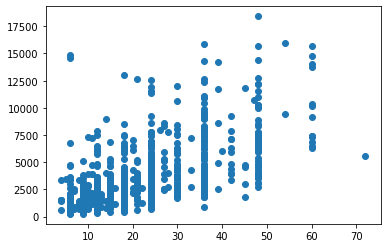

In [37]:
plt.scatter(data_copy['Duration'], data_copy['Credit amount'])

In [49]:
# Normalization
from sklearn import preprocessing

X_train = preprocessing.normalize(data_copy)

## Some outliers are flying around but is nothing to worry about since those are the datapoints that HBOS will detects to build the model

In [38]:
# Putting all variables into the model first
from pyod.models.hbos import HBOS

random_state = np.random.RandomState(42)
outliers_fraction = 0.05

In [50]:
outlier = HBOS(int(len(X_train)**(1/2)), contamination=outliers_fraction)

In [51]:
outlier.fit(X_train)

HBOS(alpha=0.1, contamination=0.05, n_bins=31, tol=0.5)

In [52]:
data_copy['Targets'] = outlier.predict(X_train)

In [96]:
data_copy['Targets'].value_counts()

0    950
1     50
Name: Targets, dtype: int64

In [54]:
## Using PCA from dimensionality reduction
from sklearn.decomposition import PCA 
pca = PCA(5)  
projected = pca.fit_transform(X_train)
print(projected)

[[ 3.63574910e-02 -1.02037653e-02 -1.06514771e-03 -8.47624793e-07
   1.05764892e-04]
 [-1.58414566e-02  2.09086369e-03  2.91207356e-04  3.47960869e-04
   1.82753062e-04]
 [ 3.10947567e-03 -3.67341048e-03  4.92953269e-05 -4.81179472e-04
  -5.07605700e-06]
 ...
 [ 2.82346836e-02  1.20360736e-03 -1.18885468e-03 -1.35065091e-05
   7.49343410e-04]
 [-4.33191042e-03  1.66130230e-02  1.66755821e-04  3.27246958e-04
   2.14053881e-04]
 [-1.33599441e-02  3.44505240e-03  3.02670045e-04  1.67606649e-04
   5.09200009e-05]]


In [55]:
from sklearn.model_selection import train_test_split

In [68]:
Xtrain, Xtest = train_test_split(projected)

In [69]:
Xtrain.shape

(562, 5)

In [70]:
Xtest.shape

(188, 5)

In [71]:
outlier.fit(Xtrain)

HBOS(alpha=0.1, contamination=0.05, n_bins=31, tol=0.5)

In [81]:
ypred = outlier.predict(Xtrain)

pd.DataFrame(ypred)[0].value_counts()

0    533
1     29
Name: 0, dtype: int64

OUTLIERS: 10 INLIERS: 990


/Users/habeebhassan/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:28: UserWarning: No contour levels were found within the data range.


ValueError: Contour levels must be increasing

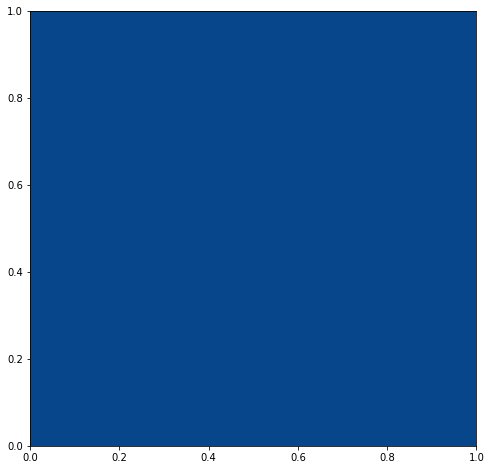

In [88]:
from numpy import percentile
outliers_fraction = 0.01
xx , yy = np.meshgrid(np.linspace(0, 1, 100), np.linspace(0, 1, 100))
clf = HBOS(contamination=outliers_fraction)
clf.fit(data_copy)
scores_pred = clf.decision_function(data_copy) * -1
y_pred = clf.predict(data_copy)
n_inliers = len(y_pred) - np.count_nonzero(y_pred)
n_outliers = np.count_nonzero(y_pred == 1)
plt.figure(figsize=(8, 8))
new_data = data_copy
new_data['outlier'] = y_pred.tolist()
    
# sales - inlier feature 1,  profit - inlier feature 2
inliers_sales = np.array(new_data['Age'][new_data['outlier'] == 0]).reshape(-1,1)
inliers_profit = np.array(new_data['Sex_male'][new_data['outlier'] == 0]).reshape(-1,1)
    
# sales - outlier feature 1, profit - outlier feature 2
outliers_sales = new_data['Age'][new_data['outlier'] == 1].values.reshape(-1,1)
outliers_profit = new_data['Sex_male'][new_data['outlier'] == 1].values.reshape(-1,1)
         
print('OUTLIERS:',n_outliers,'INLIERS:',n_inliers)
threshold = percentile(scores_pred, 100 * outliers_fraction)
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()]) * -1
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, levels=np.linspace(Z.min(), threshold, 7),cmap=plt.cm.Blues_r)
a = plt.contour(xx, yy, Z, levels=[threshold],linewidths=2, colors='red')
plt.contourf(xx, yy, Z, levels=[threshold, Z.max()],colors='orange')
b = plt.scatter(inliers_sales, inliers_profit, c='white',s=20, edgecolor='k')
    
c = plt.scatter(outliers_sales, outliers_profit, c='black',s=20, edgecolor='k')
       
plt.axis('tight')      
plt.legend([a.collections[0], b,c], ['learned decision function', 'inliers','outliers'],
           prop=matplotlib.font_manager.FontProperties(size=20),loc='lower right')      
plt.xlim((0, 1))
plt.ylim((0, 1))
plt.title('Histogram-base Outlier Detection (HBOS)')
plt.show();

In [89]:
threshold = percentile(scores_pred, 100 * outliers_fraction)


In [90]:
threshold

32.530660560568144